In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Bài 1:

In [67]:
def show_stars(n):
    str=""
    for i in range(1,n+1):
        str+="*"
        print(str)

In [68]:
show_stars(2)

*
**


In [69]:
show_stars(5)

*
**
***
****
*****


### Bài 2

### Bài 3

### 1. Dùng Pandas đọc và tổng hợp dữ liệu của các năm

In [70]:
%config Completer.use_jedi = False

In [71]:
df1=pd.read_csv(r'C:\Users\Laptop EDG\Downloads\Names\Names\yob1880.txt', header=None).head(5)
df1

,0,1,2
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746


In [72]:
def process_data():
    alldata=pd.DataFrame(columns=['Name','Sex','Quantity','Year'])
    for year in range(1880,2019):
        url='C:/Users/Laptop EDG/Downloads/Names/Names/yob'+str(year)+'.txt'
        df=pd.read_csv(url, header=None)
        df.columns=['Name','Sex','Quantity']
        df['Year']=year
        alldata=pd.concat([alldata,df],ignore_index=True)
    return alldata

In [73]:
data=process_data()
data

,Name,Sex,Quantity,Year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1957041,Zylas,M,5,2018
1957042,Zyran,M,5,2018
1957043,Zyrie,M,5,2018
1957044,Zyron,M,5,2018


### 2. Vẽ biểu đồ tổng số trẻ em sinh ra theo giới tính và năm (Total births by sex and year)

In [74]:
data.Quantity=data.Quantity.apply(lambda x:int(x))

In [75]:
data.dtypes

Name        object
Sex         object
Quantity     int64
Year        object
dtype: object

In [76]:
# Cách 1:
data_f=data[data.Sex=='F'].groupby('Year').Quantity.sum()
data_f.tail(3)

Year
2016    1766212
2017    1719138
2018    1686961
Name: Quantity, dtype: int64

In [77]:
data_m=data[data.Sex=='M'].groupby('Year').Quantity.sum()
data_m.tail(3)

Year
2016    1891585
2017    1842837
2018    1800392
Name: Quantity, dtype: int64

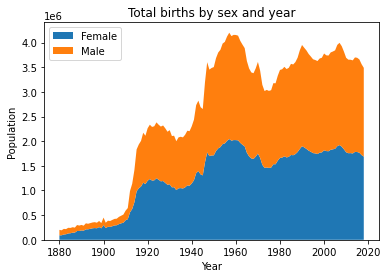

In [78]:
plt.stackplot(data_f.index,data_f.values,data_m.values,labels=['Female','Male'])
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Total births by sex and year')
plt.legend(loc='upper left');

<AxesSubplot:xlabel='Year'>

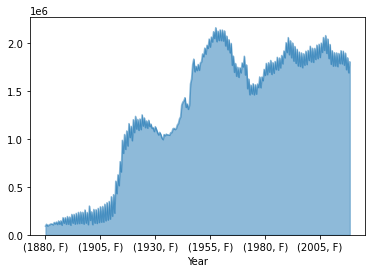

In [79]:
# Cách: (k ổn lắm)
data.groupby(['Year','Sex']).Quantity.sum().plot(kind='area',stacked=False,xlabel='Year')

### 3. Tạo subset gồm top 1000 cái tên phổ biến mỗi năm theo từng loại giới tính

In [80]:
data_name=data.set_index('Name')
data_name.groupby(['Year','Sex']).Quantity.nlargest(1000)

Year  Sex  Name     
1880  F    Mary         7065
           Anna         2604
           Emma         2003
           Elizabeth    1939
           Minnie       1746
                        ... 
2018  M    Korbyn        207
           Randall       207
           Benton        206
           Coleman       206
           Markus        206
Name: Quantity, Length: 277877, dtype: int64

### 4. Vẽ biểu đồ số lượng các bé sinh theo năm có các tên sau: Philip, Harry, Elizabeth, Marilyn

In [86]:
data_Philip=data[data.Name=='Philip'].groupby('Year').Quantity.sum()
data_Harry=data[data.Name=='Harry'].groupby('Year').Quantity.sum()
data_Elizabeth=data[data.Name=='Elizabeth'].groupby('Year').Quantity.sum()
data_Marilyn=data[data.Name=='Marilyn'].groupby('Year').Quantity.sum()

In [87]:
data_combined=pd.concat([data_Philip,data_Harry,data_Elizabeth,data_Marilyn],axis=1)
data_combined

,Quantity,Quantity,Quantity,Quantity
Year,,,,
1880,186,2158,1948,NaN
1881,156,2002,1852,NaN
1882,182,2246,2193,NaN
1883,166,2116,2268,NaN
1884,161,2338,2565,NaN
...,...,...,...,...
2014,797,336,9570,797.0
2015,706,301,9735,748.0
2016,712,375,9567,633.0


In [88]:
data_combined.columns=['Philip', 'Harry', 'Elizabeth', 'Marilyn']

In [89]:
data_combined.Marilyn=data_combined.Marilyn.replace(np.nan,0)

In [90]:
data_combined

,Philip,Harry,Elizabeth,Marilyn
Year,,,,
1880,186,2158,1948,0.0
1881,156,2002,1852,0.0
1882,182,2246,2193,0.0
1883,166,2116,2268,0.0
1884,161,2338,2565,0.0
...,...,...,...,...
2014,797,336,9570,797.0
2015,706,301,9735,748.0
2016,712,375,9567,633.0


In [91]:
data_combined.Marilyn=data_combined.Marilyn.apply(lambda x:int(x))
data_combined

,Philip,Harry,Elizabeth,Marilyn
Year,,,,
1880,186,2158,1948,0
1881,156,2002,1852,0
1882,182,2246,2193,0
1883,166,2116,2268,0
1884,161,2338,2565,0
...,...,...,...,...
2014,797,336,9570,797
2015,706,301,9735,748
2016,712,375,9567,633


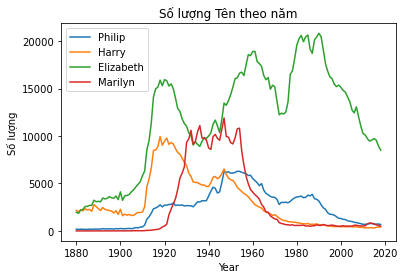

In [94]:
data_combined.plot(kind='line')
plt.title('Số lượng Tên theo năm')
plt.ylabel('Số lượng');

### 5. Vẽ biểu đồ thể hiện sự đa dạng trong việc đặt tên qua các năm theo từng giới tính (thể hiện bằng xu hướng giảm dần từng năm của tổng tỷ lệ % của top 1000 tên phổ biến)

In [103]:
data.groupby(['Year','Sex']).Quantity.sum()

Year  Sex
1880  F        90994
      M       110490
1881  F        91953
      M       100743
1882  F       107847
              ...   
2016  M      1891585
2017  F      1719138
      M      1842837
2018  F      1686961
      M      1800392
Name: Quantity, Length: 278, dtype: int64

### 6. Vẽ biểu đồ thể hiện sự thay đổi trong cách đặt chữ cái đầu tiên trong tên của nam và nữ qua các năm 1900, 1960 và 2018

### 7. Xác định xu hướng tên con trai biến thành tên con gái và ngược lại. Lấy ví dụ tên có chữ “Lesl…” Ban đầu nam đặt nhiều sau đó giảm, nữ ngược lại.